# Intrusion Detection On NSL KDD Binary Classification
## Contents 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

KDDTrain_dataset_path   = "PKDDTrain+.csv"
KDDTrain20_dataset_path = "PKDDTrain+_20Percent.csv"
KDDTest_dataset_path    = "PKDDTest+.csv"
KDDTest20_dataset_path  = "PKDDTest-21.csv"

## Data Preprocessing
### Loading the NSLKDD dataset

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path)
    return data

KDDTrain   =  load_data(KDDTrain_dataset_path)
KDDTrain20 =  load_data(KDDTrain20_dataset_path)
KDDTest    =  load_data(KDDTest_dataset_path)
KDDTest20  =  load_data(KDDTest20_dataset_path)

### Normalizing the data

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from keras.utils.np_utils import to_categorical

class SplitData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super(SplitData, self).__init__()
    
    def fit(self,X,y=None):
        return self 
    
    def transform(self, X, labels, y=None):
        
        # Preparing the labels
        y = X[labels]
        X.drop('labels5',axis=1,inplace=True)
        X.drop('labels2',axis=1,inplace=True)
        
        if (labels == 'labels2'):
            y = (y == 'normal')
            y_ = np.asarray(y).astype('float32')
        else:
            y_ = to_categorical(y)

        # Scalling
        # scaler = StandardScaler().fit(X)
        # X_ = scaler.transform(X)
        
        # Normalization 
        normalize = MinMaxScaler().fit(X)
        X_ = normalize.transform(X)
        return X_,y_

/home/labed/ml/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
X_train, y_train = SplitData().transform(KDDTrain, labels='labels2')
X_train20, y_train20 = SplitData().transform(KDDTrain20, labels='labels2')
X_test, y_test = SplitData().transform(KDDTest, labels='labels2')
X_test20, y_test20 = SplitData().transform(KDDTest20, labels='labels2')

### Data Description

In [5]:
def description(data):
    print("Number of samples(examples) ",data.shape[0]," Number of features",data.shape[1])
    print("Dimension of data set ",data.shape)
print("#Features ")    
for data in [X_train,X_train20,X_test,X_test20]:
    description(data)
    print('---------------------------------------------------------------')
print("#Labels")    
for data in [y_train,y_train20,y_test,y_test20]:
    print("Dimension of data set ",data.shape)
    print('---------------------------------------------------------------')

#Features 
Number of samples(examples)  125973  Number of features 121
Dimension of data set  (125973, 121)
---------------------------------------------------------------
Number of samples(examples)  25192  Number of features 121
Dimension of data set  (25192, 121)
---------------------------------------------------------------
Number of samples(examples)  22544  Number of features 121
Dimension of data set  (22544, 121)
---------------------------------------------------------------
Number of samples(examples)  11850  Number of features 121
Dimension of data set  (11850, 121)
---------------------------------------------------------------
#Labels
Dimension of data set  (125973,)
---------------------------------------------------------------
Dimension of data set  (25192,)
---------------------------------------------------------------
Dimension of data set  (22544,)
---------------------------------------------------------------
Dimension of data set  (11850,)
----------------------

In [6]:
print("maximum element:",np.max(X_train))
print("minimum element:",np.min(X_train))

maximum element: 1.0
minimum element: 0.0


## Building the network
### The network architecture

In [7]:
from keras import layers,optimizers,metrics,models
#from keras.models import Model, load_model

#model = models.Sequential()

#model.add(layers.Dense(256, activation='relu', input_shape=(121,)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(121,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(114, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(78, activation='relu'))
model.add(layers.Dense(34, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### The compilation step

In [26]:
#optimizers.RMSprop(lr=0.001) rmsprop
model.compile(optimizer=optimizers.RMSprop(lr=0.00001),
             loss='binary_crossentropy',
             metrics=[metrics.binary_accuracy])

In [35]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=128)

Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 7s 71us/step - loss: 0.0381 - binary_accuracy: 0.9867 - val_loss: 0.0332 - val_binary_accuracy: 0.9891
Epoch 2/100
100778/100778 [==============================] - 7s 71us/step - loss: 0.0378 - binary_accuracy: 0.9866 - val_loss: 0.0329 - val_binary_accuracy: 0.9892
Epoch 3/100
100778/100778 [==============================] - 7s 71us/step - loss: 0.0374 - binary_accuracy: 0.9867 - val_loss: 0.0325 - val_binary_accuracy: 0.9901
Epoch 4/100
100778/100778 [==============================] - 7s 72us/step - loss: 0.0368 - binary_accuracy: 0.9872 - val_loss: 0.0323 - val_binary_accuracy: 0.9901
Epoch 5/100
100778/100778 [==============================] - 7s 72us/step - loss: 0.0365 - binary_accuracy: 0.9872 - val_loss: 0.0320 - val_binary_accuracy: 0.9902
Epoch 6/100
100778/100778 [==============================] - 7s 72us/step - loss: 0.0361 - binary_accuracy: 0.9873 - val_loss: 0.

100778/100778 [==============================] - 7s 70us/step - loss: 0.0267 - binary_accuracy: 0.9914 - val_loss: 0.0253 - val_binary_accuracy: 0.9920
Epoch 51/100
100778/100778 [==============================] - 7s 73us/step - loss: 0.0268 - binary_accuracy: 0.9914 - val_loss: 0.0249 - val_binary_accuracy: 0.9921
Epoch 52/100
100778/100778 [==============================] - 7s 70us/step - loss: 0.0271 - binary_accuracy: 0.9915 - val_loss: 0.0247 - val_binary_accuracy: 0.9923
Epoch 53/100
100778/100778 [==============================] - 7s 73us/step - loss: 0.0266 - binary_accuracy: 0.9915 - val_loss: 0.0247 - val_binary_accuracy: 0.9923
Epoch 54/100
100778/100778 [==============================] - 7s 68us/step - loss: 0.0270 - binary_accuracy: 0.9916 - val_loss: 0.0245 - val_binary_accuracy: 0.9925
Epoch 55/100
100778/100778 [==============================] - 7s 69us/step - loss: 0.0266 - binary_accuracy: 0.9917 - val_loss: 0.0246 - val_binary_accuracy: 0.9923
Epoch 56/100
100778/100

Epoch 100/100
100778/100778 [==============================] - 7s 71us/step - loss: 0.0221 - binary_accuracy: 0.9933 - val_loss: 0.0210 - val_binary_accuracy: 0.9943


 ## Ploating

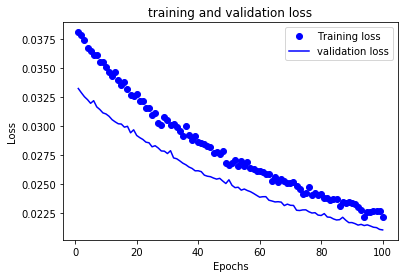

In [36]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_binary_accuracy']

epochs = range(1,len(acc) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')

plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


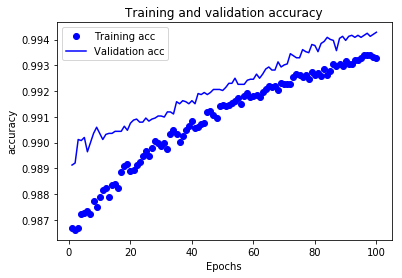

In [38]:
plt.show()


plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Evaluation 

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

y_test_pred = model.predict_classes(X_test)

In [40]:
def score_detail(y_test,y_test_pred):
    # Confusion matrix
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_test_pred))
    # Accuracy 
    print('Accuracy ',accuracy_score(y_test, y_test_pred))
    # Precision 
    print('Precision ',precision_score(y_test, y_test_pred))
    # Recall
    print('Recall ',recall_score(y_test, y_test_pred))
    # F1 score
    print('F1 score ',f1_score(y_test,y_test_pred))

### Test 

In [41]:
score_detail(y_test,y_test_pred)

Confusion matrix
[[8456 4377]
 [ 280 9431]]
Accuracy  0.7934261887863733
Precision  0.6830098493626883
Recall  0.9711667181546699
F1 score  0.801989880522131


In [42]:
model.evaluate(X_test,y_test)

22544/22544 [==============================] - 9s 411us/step


[1.6026554575111953, 0.7934261887863733]

### Test21

In [43]:
y_test_pred20 = model.predict_classes(X_test20)
score_detail(y_test20,y_test_pred20)

Confusion matrix
[[5329 4369]
 [ 273 1879]]
Accuracy  0.6082700421940929
Precision  0.30073623559539053
Recall  0.8731412639405205
F1 score  0.44738095238095243


## Saving the model 

In [243]:
from keras.models import load_model

model.save('BC_MODEL.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')